In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [3]:
# Load treatment plan results
result = np.load('res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)

In [4]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals_10.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res_linear_quadratic_gp_minimize.pkl', 'wb'))

In [5]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Chestwall_L,MaxDvh,AtMost,3000,2.04
1,D2cm,MaxDose,AtMost,2400,NaN
2,Esophagus,MaxDvh,AtMost,1880,16.91
3,Lungs,MaxDvh,AtMost,1160,29.19
4,Lungs,MaxDvh,AtMost,1240,19.46
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Rib,MaxDvh,AtMost,3200,0.27
8,Rib,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,2.30


In [6]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Chestwall_L,MaxDvh,3000,2.04,NaN,1
1,D2cm,MaxDose,"[0,2400]",0.00,NaN,1
2,Esophagus,MaxDvh,1880,16.91,NaN,1
3,Lungs,MaxDvh,1160,29.19,NaN,1
4,Lungs,MaxDvh,1240,19.46,NaN,1
5,PTV,MinDvh,4800,95.00,NaN,1
6,PTV,MaxDose,8000,0.00,NaN,1
7,Rib,MaxDvh,3200,0.27,NaN,1
8,Rib,MaxDose,"[0,4000]",0.00,NaN,1
9,SpinalCanal,MaxDvh,1360,2.30,NaN,1


In [7]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,Chestwall_L,MaxDvh,3000.0,1615.686529,-46.143782
1,D2cm,MaxDose,2400.0,2419.716064,0.821503
2,Esophagus,MaxDvh,1880.0,604.229145,-67.860152
3,Lungs,MaxDvh,1160.0,245.716405,-78.817551
4,Lungs,MaxDvh,1240.0,402.930732,-67.505586
5,PTV,MinDvh,4800.0,4799.999914,-0.000002
6,PTV,MaxDose,8000.0,6897.578125,-13.780273
7,Rib,MaxDvh,3200.0,2093.415677,-34.580760
8,Rib,MaxDose,4000.0,2410.192383,-39.745190
9,SpinalCanal,MaxDvh,1360.0,873.443069,-35.776245


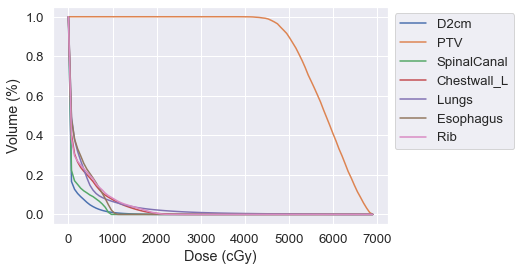

In [8]:
# Dose-volume histograms
result.dvhplot()

In [9]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 445.12, Linear-Quadratic: 444.45


In [27]:
# Convergence
idx_sol = np.argmin(result.opt_result.func_vals, '.')
plt.plot(result.opt_result.func_vals)
plt.plot(np.minimum.accumulate(result.opt_result.func_vals))
plt.plot(idx_sol, result.opt_result.fun, '.')
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.ylim([-500, 0])

TypeError: 'str' object cannot be interpreted as an integer

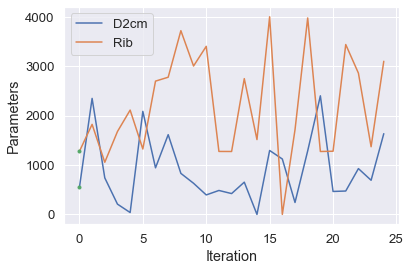

In [20]:
# Parameters
plt.plot(result.opt_result.x_iters)
plt.plot(idx_sol*np.ones(2), result.opt_result.x, '.')
plt.xlabel('Iteration')
plt.ylabel('Parameters')
plt.legend(['D2cm', 'Rib'])

In [14]:
x_iters = np.array(result.opt_result.x_iters)

Text(0, 0.5, 'Utility')

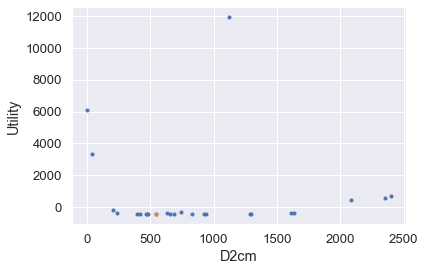

In [21]:
plt.plot(x_iters[:,0], result.opt_result.func_vals, '.')
plt.plot(result.opt_result.x[0], result.opt_result.fun, '.')
plt.xlabel('D2cm')
plt.ylabel('Utility')

Text(0, 0.5, 'Utility')

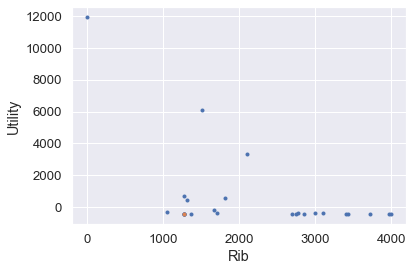

In [22]:
plt.plot(x_iters[:,1], result.opt_result.func_vals, '.')
plt.plot(result.opt_result.x[1], result.opt_result.fun, '.')
plt.xlabel('Rib')
plt.ylabel('Utility')

In [23]:
2500/4

625.0

In [24]:
result.opt_result.x

[545.6137915835166, 1275.8889030936132]